In [41]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# sigmoid and derivative
------------------

In [33]:
x= np.arange(-10,10,0.1)

In [34]:
sig_y = scipy.special.expit(x)

In [35]:
def derivative_of_sigmoid(x):
    return x*(1-x)

In [36]:
gredient_of_sig = derivative_of_sigmoid(sig_y)

In [37]:
gredient_of_sig

array([4.53958077e-05, 5.01696474e-05, 5.54454502e-05, 6.12759844e-05,
       6.77195631e-05, 7.48406256e-05, 8.27103807e-05, 9.14075170e-05,
       1.01018987e-04, 1.11640874e-04, 1.23379350e-04, 1.36351730e-04,
       1.50687644e-04, 1.66530323e-04, 1.84038022e-04, 2.03385596e-04,
       2.24766228e-04, 2.48393352e-04, 2.74502763e-04, 3.03354950e-04,
       3.35237671e-04, 3.70468792e-04, 4.09399420e-04, 4.52417356e-04,
       4.99950906e-04, 5.52473073e-04, 6.10506186e-04, 6.74626994e-04,
       7.45472275e-04, 8.23745010e-04, 9.10221180e-04, 1.00575723e-03,
       1.11129830e-03, 1.22788720e-03, 1.35667437e-03, 1.49892871e-03,
       1.65604946e-03, 1.82957928e-03, 2.02121847e-03, 2.23284056e-03,
       2.46650929e-03, 2.72449715e-03, 3.00930549e-03, 3.32368637e-03,
       3.67066628e-03, 4.05357169e-03, 4.47605669e-03, 4.94213253e-03,
       5.45619942e-03, 6.02308030e-03, 6.64805667e-03, 7.33690646e-03,
       8.09594359e-03, 8.93205910e-03, 9.85276351e-03, 1.08662297e-02,
      

In [38]:
df = pd.DataFrame()
df['x']=x
df['sigmoid']=sig_y
df['derivative'] = gredient_of_sig
df= pd.melt(df,['x'],var_name='Type')

In [39]:
df

,x,Type,value
0,-10.0,sigmoid,0.000045
1,-9.9,sigmoid,0.000050
2,-9.8,sigmoid,0.000055
3,-9.7,sigmoid,0.000061
4,-9.6,sigmoid,0.000068
...,...,...,...
395,9.5,derivative,0.000075
396,9.6,derivative,0.000068
397,9.7,derivative,0.000061
398,9.8,derivative,0.000055


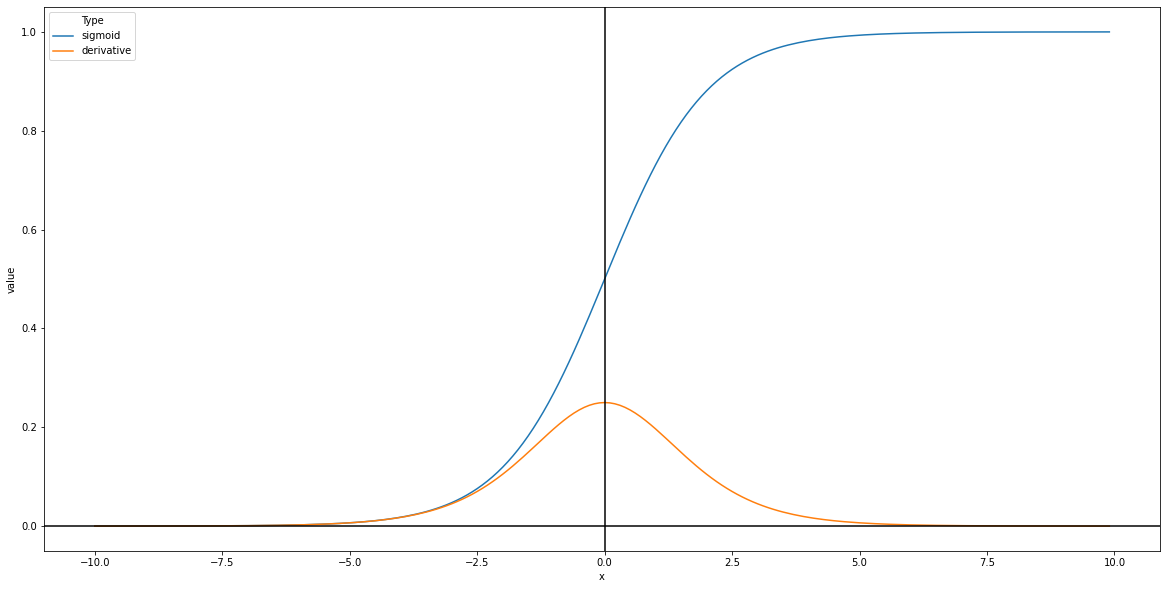

In [49]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x='x',y='value',hue='Type')
plt.axhline(color='black')
plt.axvline(color='black')

# linear regression for claasification

In [22]:
x = list(range(-4,0)) + list(range(1,5))

In [23]:
y = ([-1]*4+[1]*4)

<AxesSubplot:>

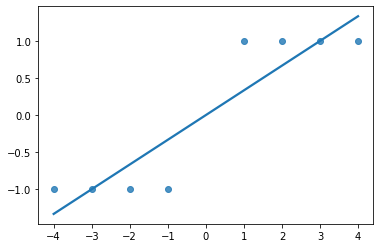

In [24]:
sns.regplot(x=x,y=y,ci=None)

In [66]:
x1 = x[:-3] + [5,10,15]
y1 = y

/home/vai/miniconda3/envs/tf2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vai/miniconda3/envs/tf2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

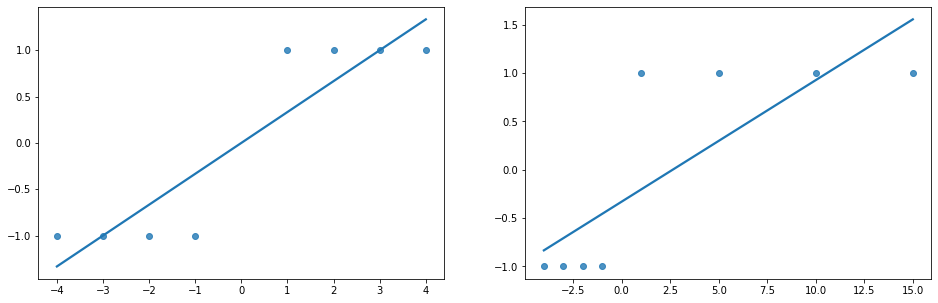

In [67]:
fig,axs = plt.subplots(1,2,figsize=(16,5))
sns.regplot(x,y,ci=None,ax=axs[0])
sns.regplot(x1,y1,ci=None,ax=axs[1])

In [33]:
fig.axes

[]

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [98]:
model.fit(np.array(x1).reshape(-1,1),y1)

LogisticRegression()

In [99]:
model.predict(np.array(x1).reshape(-1,1))

array([-1, -1, -1, -1,  1,  1,  1,  1])

In [100]:
y_hat = model.predict_proba(np.arange(-5,15).reshape(-1,1))

/home/vai/miniconda3/envs/tf2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

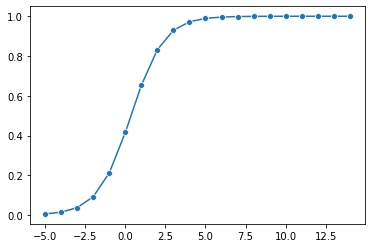

In [101]:
sns.lineplot(np.arange(-5,15),y_hat[:,1],marker='o')

In [102]:
model0 = LogisticRegression()
model0.fit(np.array(x).reshape(-1,1),y)
y_hat_0 = model0.predict_proba(np.arange(-5,15).reshape(-1,1))

/home/vai/miniconda3/envs/tf2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vai/miniconda3/envs/tf2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

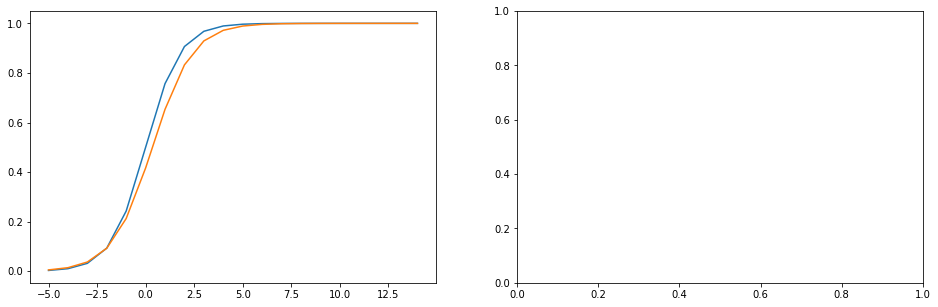

In [113]:
fig,axs = plt.subplots(1,2,figsize=(16,5))
sns.lineplot(np.arange(-5,15),y_hat_0[:,1], ax=axs[0])
# sns.scatterplot(x,[(i+1)/2 for i in y],ax=axs[0])
sns.lineplot(np.arange(-5,15),y_hat[:,1], ax=axs[0])
# sns.scatterplot(x1,[(i+1)/2 for i in y1],ax=axs[0])

In [104]:
y_hat


array([[9.94458251e-01, 5.54174909e-03],
       [9.85505043e-01, 1.44949565e-02],
       [9.62630653e-01, 3.73693475e-02],
       [9.07062535e-01, 9.29374645e-02],
       [7.87136421e-01, 2.12863579e-01],
       [5.83514006e-01, 4.16485994e-01],
       [3.46758382e-01, 6.53241618e-01],
       [1.67443751e-01, 8.32556249e-01],
       [7.08050809e-02, 9.29194919e-01],
       [2.80607300e-02, 9.71939270e-01],
       [1.08202499e-02, 9.89179750e-01],
       [4.12731987e-03, 9.95872680e-01],
       [1.56778005e-03, 9.98432220e-01],
       [5.94580258e-04, 9.99405420e-01],
       [2.25358083e-04, 9.99774642e-01],
       [8.53957332e-05, 9.99914604e-01],
       [3.23564931e-05, 9.99967644e-01],
       [1.22594902e-05, 9.99987741e-01],
       [4.64491698e-06, 9.99995355e-01],
       [1.75987348e-06, 9.99998240e-01]])

In [105]:
y_hat_0

array([[9.96600392e-01, 3.39960846e-03],
       [9.89486767e-01, 1.05132325e-02],
       [9.67966454e-01, 3.20335459e-02],
       [9.06554760e-01, 9.34452396e-02],
       [7.56969851e-01, 2.43030149e-01],
       [5.00000000e-01, 5.00000000e-01],
       [2.43030149e-01, 7.56969851e-01],
       [9.34452396e-02, 9.06554760e-01],
       [3.20335459e-02, 9.67966454e-01],
       [1.05132325e-02, 9.89486767e-01],
       [3.39960846e-03, 9.96600392e-01],
       [1.09399174e-03, 9.98906008e-01],
       [3.51494318e-04, 9.99648506e-01],
       [1.12876499e-04, 9.99887124e-01],
       [3.62425199e-05, 9.99963757e-01],
       [1.16361857e-05, 9.99988364e-01],
       [3.73590344e-06, 9.99996264e-01],
       [1.19943941e-06, 9.99998801e-01],
       [3.85088224e-07, 9.99999615e-01],
       [1.23635139e-07, 9.99999876e-01]])

In [106]:
x

[-4, -3, -2, -1, 1, 2, 3, 4]

In [107]:
x1

[-4, -3, -2, -1, 1, 5, 10, 15]

# 数据规范化

In [150]:
from sklearn.datasets import make_regression
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [151]:
rng = np.random.default_rng(2235)
normal_samples_2d  = rng.multivariate_normal([10,-5],[[10,5],[5,3]],size=100)

Text(0.5, 1.0, '原始特征')

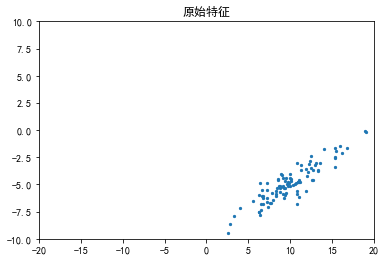

In [152]:
plt.scatter(normal_samples_2d[:,0],normal_samples_2d[:,1],s=5)
plt.ylim(-10,10)
plt.xlim(-20,20)
plt.title("原始特征")

Text(0.5, 1.0, 'Centralization')

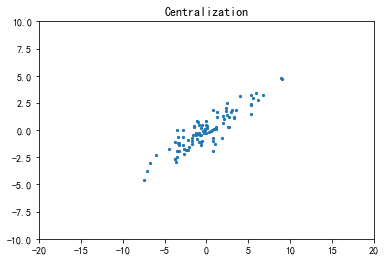

In [153]:
x = normal_samples_2d[:,0]
y = normal_samples_2d[:,1]
#中心化
x_centered = x- np.mean(x)
y_centered = y- np.mean(y)

plt.scatter(x_centered,y_centered,s=5)
plt.ylim(-10,10)
plt.xlim(-20,20)
plt.title("Centralization")

Text(0.5, 1.0, 'Min-max normalization')

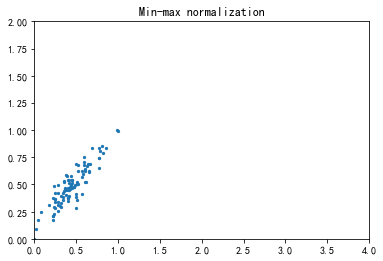

In [155]:
# 规范化
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))
plt.scatter(x_norm,y_norm,s=5)
plt.ylim(0,2)
plt.xlim(0,4)
plt.title("Min-max normalization")

Text(0.5, 1.0, 'Standardization')

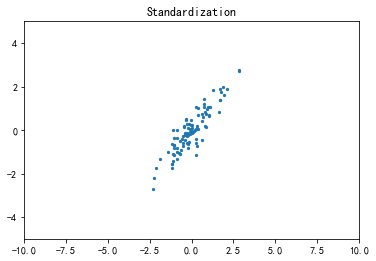

In [156]:
# 标准化
x_std = (x-np.mean(x))/np.std(x)
y_std = (y-np.mean(y))/np.std(y)
plt.scatter(x_std,y_std,s=5)
plt.ylim(-5,5)
plt.xlim(-10,10)
plt.title("Standardization")

# 生成分类数据

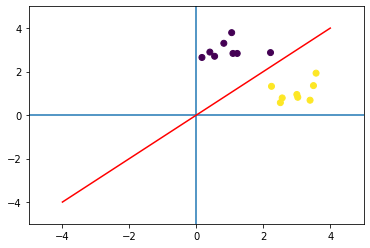

In [51]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=16, n_features=2,centers=[[1,3],[3,1]],cluster_std=[0.5,0.5],random_state=5)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.axhline()
plt.axvline()
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot([-4,4],[-4,4],color='red')


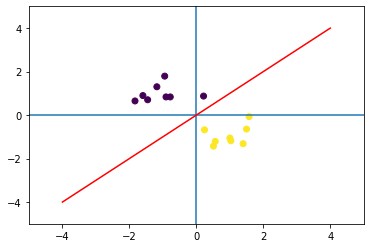

In [52]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=16, n_features=2,centers=[[-1,1],[1,-1]],cluster_std=[0.5,0.5],random_state=5)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.axhline()
plt.axvline()
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot([-4,4],[-4,4],color='red')


# 数据规范化对梯度下降的好处

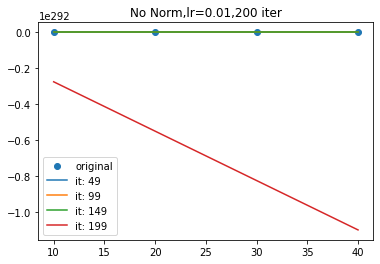

cost:  [inf]
W [[7.97887905e+291 2.66021685e+290]]


[(10.0, -10.01), (20.0, -8.02), (30.0, -6.88), (40.0, -4.1)]

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
class LinearRegression():
    def __init__(self,feature_size):
        self.feature_size = feature_size
        self.W = np.zeros((1, feature_size+1))
    
    def mse_loss(self,Y, Yp):
        m = Y.shape[0] 
        err = Yp -Y
        cost = 1/m*np.dot(err,err.T).flatten()
        return err, cost

    def predict(self,X):
        Yp = np.dot(self.W,X.T) 
        return Yp

    def update(self,X,err,lr,print_grediant=False):
        m = err.shape[0]
        dW = 1/m*np.dot(err, X)
        if print_grediant:
            print('W',self.W)
            print('Grediant:',dW)
        self.W -= dW*lr
    
    def train_one_step(self,X,Y,lr,print_grediant=False):
        Yp = self.predict(X)
        err_array, cost = self.mse_loss(Y,Yp)
        self.update(X,err_array,lr=lr,print_grediant=print_grediant)
        
            
X = np.array([[10.,1],[20,1],[30,1],[40,1]])  # add x[-1] = 1  two skip bias b
Y = np.array([-10.01,-8.02,-6.88, -4.1])

# X = normal_samples_2d[:,0].reshape(-1,1)
# X = np.concatenate([X,np.ones(X.shape)],axis=1)
# Y= normal_samples_2d[:,1]


X_norm = X.copy()
X_norm[:,0] = (X[:,0] - np.mean(X[:,0]))/np.std(X[:,0]) # comment for the non-normalized.
Y_norm = (Y - np.mean(Y))/np.std(Y) # comment for the non-normalized.

learning_rate = 0.01
model = LinearRegression(1)
plt.scatter(X[:,0].flatten(), Y.flatten(), label="original")
plt.title("No Norm,lr=0.01,200 iter")
for i in range(200):
    Yp = model.predict(X)
    err, cost = model.mse_loss(Y,Yp)
    model.train_one_step(X,Y,lr = learning_rate, print_grediant=False)
    if i%50 == 49:
        plt.plot(X[:,0].flatten(),Yp.flatten(), label="it: "+str(i))
        # print(Yp)
        # print("cost: ", cost)

plt.legend(loc="best")
plt.show()
print("cost: ", cost)
print('W',model.W)
[(x[0],y) for x,y in zip(X,Y)]

W [[0. 0.]]
Grediant: [[630.9   29.01]]
W [[-0.31545  -0.014505]]
Grediant: [[-316.9005    -2.59302]]
W [[-0.15699975 -0.01320849]]
Grediant: [[158.579901    13.25719104]]
W [[-0.2362897  -0.01983709]]
Grediant: [[-79.95281005   5.30168161]]
W [[-0.1963133  -0.02248793]]
Grediant: [[39.71132095  9.28871875]]
W [[-0.21616896 -0.02713229]]
Grediant: [[-20.32009641   7.28457526]]
W [[-0.20600891 -0.03077457]]
Grediant: [[9.79581944 8.28601093]]
W [[-0.21090682 -0.03491758]]
Grediant: [[-5.31221027  7.77964794]]
W [[-0.20825071 -0.0388074 ]]
Grediant: [[2.26712274 8.02969916]]
W [[-0.20938427 -0.04282225]]
Grediant: [[-1.53504633  7.90028362]]
W [[-0.20861675 -0.04677239]]
Grediant: [[0.37250898 7.96123537]]
W [[-0.20880301 -0.05075301]]
Grediant: [[-0.58431626  7.92668745]]
W [[-0.20851085 -0.05471636]]
Grediant: [[-0.10417624  7.94004989]]
W [[-0.20845876 -0.05868638]]
Grediant: [[-0.34491437  7.9293786 ]]
W [[-0.2082863  -0.06265107]]
Grediant: [[-0.22401174  7.93076556]]
W [[-0.2081743

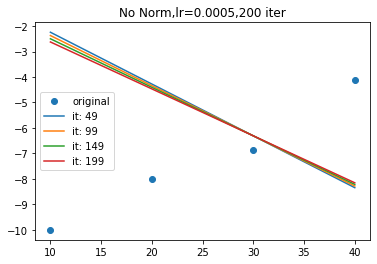

cost:  [21.0078597]
W [[-0.1844551  -0.77783204]]


In [55]:
learning_rate = 0.0005
model = LinearRegression(1)
plt.scatter(X[:,0].flatten(), Y.flatten(), label="original")
plt.title("No Norm,lr=0.0005,200 iter")
for i in range(200):
    Yp = model.predict(X)
    err, cost = model.mse_loss(Y,Yp)
    model.train_one_step(X,Y,lr = learning_rate,print_grediant=True)
    if i%50 == 49:
        plt.plot(X[:,0].flatten(),Yp.flatten(), label="it: "+str(i))
        # print(Yp)
        # print("cost: ", cost)

plt.legend(loc="best")
plt.show()
print("cost: ", cost)
print('W',model.W)

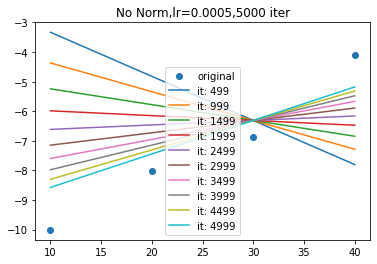

cost:  [0.97066082]
W [[ 0.11324743 -9.70692545]]


In [13]:
learning_rate = 0.0005
model = LinearRegression(1)
plt.scatter(X[:,0].flatten(), Y.flatten(), label="original")
plt.title("No Norm,lr=0.0005,5000 iter")
for i in range(5000):
    Yp = model.predict(X)
    err, cost = model.mse_loss(Y,Yp)
    model.train_one_step(X,Y,lr = learning_rate)
    if i%500 == 499:
        plt.plot(X[:,0].flatten(),Yp.flatten(), label="it: "+str(i))
        # print(Yp)
        # print("cost: ", cost)

plt.legend(loc="best")
plt.show()
print("cost: ", cost)
print('W',model.W)

In [7]:
model.W

array([[ 9.10401719e-01, -1.22124533e-16]])

In [ ]:
X = X_norm
Y = Y_norm
learning_rate = 0.01
model = LinearRegression(1)
plt.scatter(X_norm[:,0].flatten(), Y_norm.flatten(), label="original")
plt.title("Norm, lr=0.01,iter=200")
for i in range(200):
    Yp = model.predict(X_norm)
    err, cost = model.mse_loss(Y_norm,Yp)
    model.train_one_step(X_norm,Y_norm,lr = learning_rate,print_grediant=True)
    if i%50 == 49:
        plt.plot(X_norm[:,0].flatten(),Yp.flatten(), label="it: "+str(i))

plt.legend(loc="best")
plt.show()
print("cost: ", cost)
print('W',model.W)

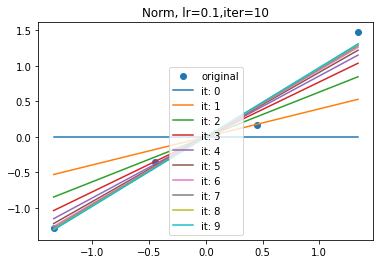

cost:  [0.02560708]
W [[ 9.81194557e-01 -1.16573418e-16]]


In [15]:
model = LinearRegression(1)
plt.title("Norm, lr=0.1,iter=10")
learning_rate = 0.1
plt.scatter(X_norm[:,0].flatten(), Y_norm.flatten(), label="original")
for i in range(10):
    Yp = model.predict(X_norm)
    err, cost = model.mse_loss(Y_norm,Yp)
    model.train_one_step(X_norm,Y_norm,lr = learning_rate)
    plt.plot(X_norm[:,0].flatten(),Yp.flatten(), label="it: "+str(i))

plt.legend(loc="best")
plt.show()
print("cost: ", cost)
print('W',model.W)

In [186]:
Y

array([-0.48300971, -0.15614887,  0.12216828,  0.51699029])

# 随机正态分布初始化

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
rng = np.random.default_rng(261)

### 5神经元*7层

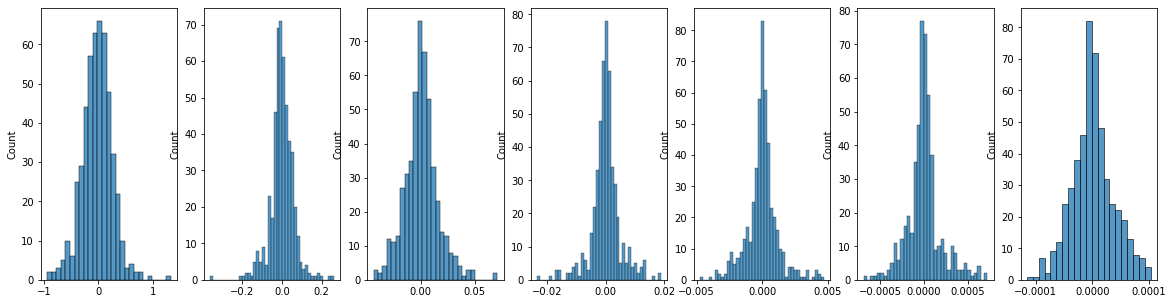

In [96]:
W = rng.normal(0,0.1,(7,5,5))# 7 layer
X = rng.normal(0,1,(100,5))
y=X
fig,axs = plt.subplots(1,7,figsize=(20,5))
for w,ax in zip(W,axs):
    y = np.dot(y,w)
    sns.histplot(y.flatten(),ax=ax)

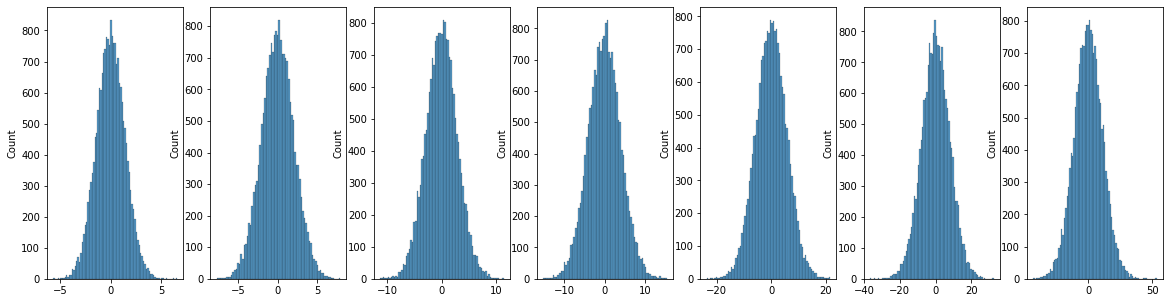

In [99]:
W = rng.normal(0,0.1,(7,200,200))# 7 layer
X = rng.normal(0,1,(100,200))
y=X
fig,axs = plt.subplots(1,7,figsize=(20,5))
for w,ax in zip(W,axs):
    y = np.dot(y,w)
    sns.histplot(y.flatten(),ax=ax)

# 画等高线

In [115]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
rng= np.random.default_rng(1234)

In [148]:
x_list = np.linspace(-50.,50,2000)
y_list = np.linspace(-25,25,2000)
x,y = np.meshgrid(x_list, y_list)
z = np.sqrt(x**2 + 20*y**2)

(-50.0, 50.0)

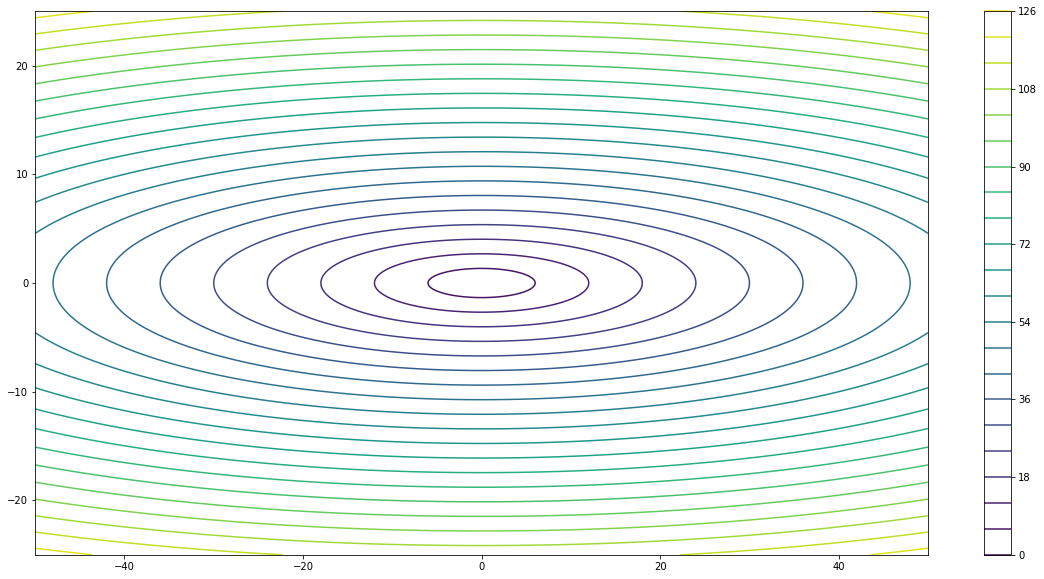

In [149]:
fig = plt.figure(figsize=(20,10))
cp = plt.contour(x,y,z,20)
fig.colorbar(cp)
plt.ylim(-25,25)
plt.xlim(-50,50)

/home/vai/miniconda3/envs/tf2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-10.0, 10.0)

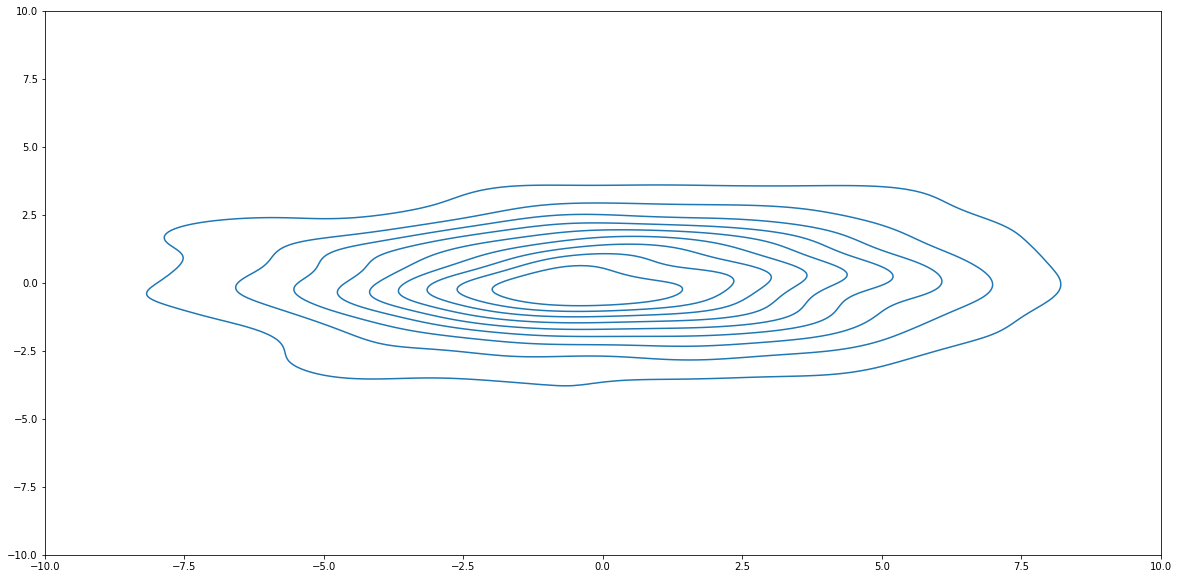

In [119]:
plt.figure(figsize=(20,10))
sns.kdeplot(normal_samples_2d[:,0],normal_samples_2d[:,1])
plt.ylim(-10,10)
plt.xlim(-10,10)